# Download data set

# Imports

In [1]:
#Loading the required modules
import os
import random
import scipy.io
import numpy as np
import matplotlib.image as image
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist 
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# set up and preview dataSet

In [2]:
def loadData(imagePath , groundTruthPath):
    images = []
    groundTruths = []
    imageFiles = sorted(os.listdir(imagePath))
    if "Thumbs.db" in imageFiles : imageFiles.remove("Thumbs.db")
    groundTruthFiles = sorted(os.listdir(groundTruthPath))
    numOfImages = len(imageFiles)
    for i in range(numOfImages):
        imgPath = os.path.join(imagePath , imageFiles[i])
        matPath = os.path.join(groundTruthPath , groundTruthFiles[i])
        images.append(image.imread(imgPath))
        #read and extract all ground truths from the .mat file and insert them into the array
        data = scipy.io.loadmat(matPath)
        allGroundTruths = data['groundTruth'][0]
        imageGroundTruths = []
        for gt in range(len(allGroundTruths)):
            imageGroundTruths.append(allGroundTruths[gt][0][0][0])
        groundTruths.append(imageGroundTruths)
    return images , groundTruths

In [3]:
TrainImages , TrainGroundTruths = loadData('../input/bsr-images/data-2/data/images/train','../input/bsr-images/data-2/data/groundTruth/train')
TestImages , TestGroundTruths = loadData('../input/bsr-images/data-2/data/images/test','../input/bsr-images/data-2/data/groundTruth/test')

In [4]:
def previewRandomData(imageArray , groundTruthArray):
    a = random.randint(0,199)
    plt.imshow(imageArray[a])
    plt.show()
    for t in range(len(groundTruthArray[a])) :    
        so=np.array(groundTruthArray[a][t])
        plt.imshow(groundTruthArray[a][t])
        result, indices=np.unique(groundTruthArray[a][t],return_inverse=True)  
        plt.show()

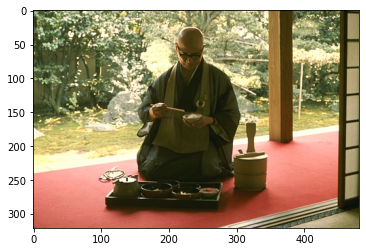

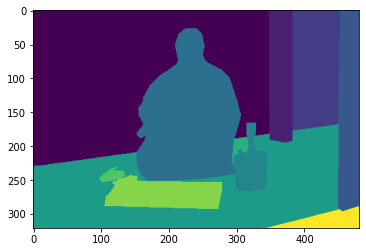

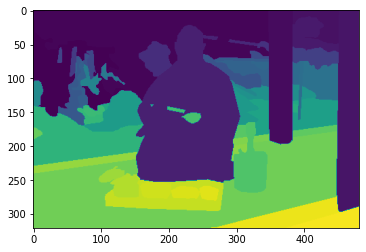

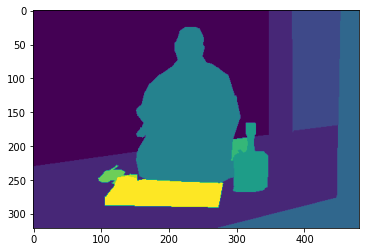

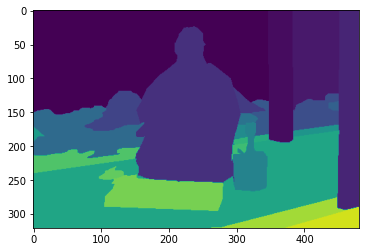

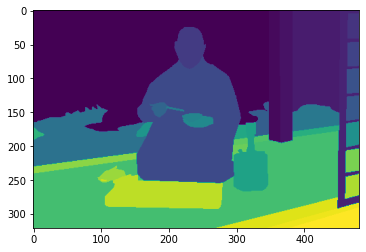

In [5]:
# pyramids photo in the assignment report index = 132
                    #preview random training data
previewRandomData(TrainImages , TrainGroundTruths)

                        #preview random test data
#previewRandomData(TestImages , TestGroundTruths)

# K-means Algorithm

**K-means Algorithm:**
- Randomly pick k data points as our initial Centroids.
- Find the distance between each data points using Euclidean Distance in our training set with the k centroids.
- assign each data point to the closest centroid according to the distance found.
- Update centroid location by taking the average of the points in each cluster group.
- Repeat till the centroids don’t change.

**The Parameters:**
- x >> the data to be clustered
- k >> number of clusters
- no_of_iterations >> maximum number of allowed iteration to terminate after it

In [6]:
def kmeans(x,k, no_of_iterations):
    idx = np.random.choice(len(x), k, replace=False)
    #Randomly choosing Centroids 
    centroids = x[idx, :] #Step 1
     
    #finding the distance between centroids and all the data points
    distances = cdist(x, centroids ,'euclidean') #Step 2
     
    #Centroid with the minimum Distance
    points = np.array([np.argmin(i) for i in distances]) #Step 3
     
    #Repeating the above steps for a defined number of iterations
    #Step 4
    for _ in range(no_of_iterations): 
        centroids = []
        for idx in range(k):
            #Updating Centroids by taking mean of Cluster it belongs to
            temp_cent = x[points==idx].mean(axis=0) 
            centroids.append(temp_cent)
 
        centroids = np.vstack(centroids) #Updated Centroids 
         
        distances = cdist(x, centroids ,'euclidean')
        points = np.array([np.argmin(i) for i in distances])
         
    return points,centroids 

(154401, 3)


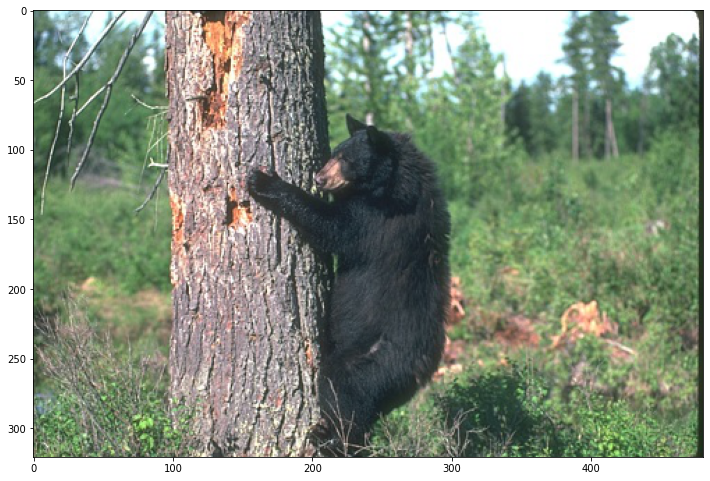

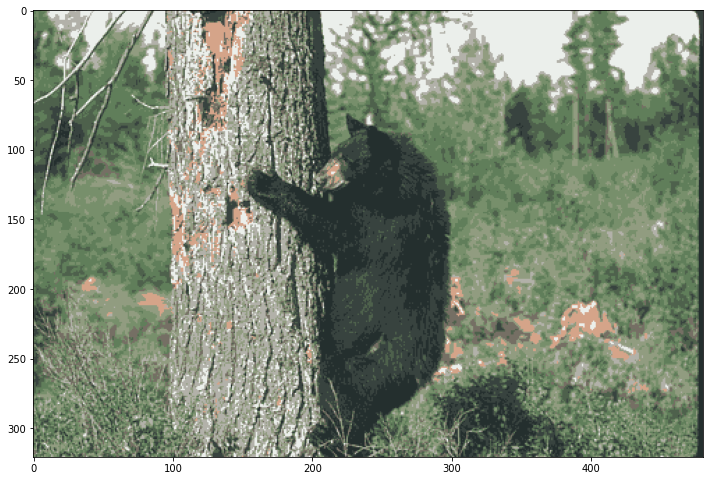

In [7]:

tempData = TestImages[1]
plt.figure(figsize = (12, 10))
plt.imshow(tempData)
tempData = tempData/255.0 #Scaling the pixels
tempData2 = tempData.reshape((-1, 3)) #reshaping the image to become 2d
print(tempData2.shape)
#Applying our function
labels,centroids = kmeans(tempData2,10,5) 
img_seg = centroids[labels]
img_seg = img_seg.reshape(tempData.shape)
plt.figure(figsize = (12, 10))
plt.imshow(img_seg)


# Measures

In [8]:
def getF_measure(labels,gt):
    gt=np.array(gt).flatten()
    result1=np.unique(gt)
    result2=np.unique(labels)
    pred_cls=[]
    true_cls=[]
    for c in result1:
        pos=np.where(gt== (c))[0]
        true_cls.append(pos)
    for c in result2:
        pos=np.where(labels== (c))[0]
        pred_cls.append(pos)  
    prec=[]
    recall=[]
    for i in range(len(pred_cls)):
        maxratio1=- 1
        maxratio2=-1    
        for k in range(len(true_cls)):
            pred_true=np.intersect1d(pred_cls[i],true_cls[k] )
            tempPrec=pred_true.size/pred_cls[i].size
            temprecall=pred_true.size/true_cls[k].size
            if(maxratio1<tempPrec):
                maxratio1=tempPrec
            if(maxratio2<temprecall):
                maxratio2=temprecall   
        if(maxratio1>0):
            prec.append(maxratio1)
        if(maxratio2>0):
            recall.append(maxratio2)
    f=[]
    for i in range(len(prec)):
        f.append(((2*prec[i]*recall[i])/(prec[i]+recall[i])))  
    f=np.array(f)
    s=np.sum(f)/result1.size
    return s

In [9]:
def getC_entropy(labels,gt):
    gt=np.array(gt).flatten()
    result1=np.unique(gt)
    result2=np.unique(labels)
    pred_cls=[]
    true_cls=[]
    for c in result1:
        pos=np.where(gt== (c))[0]
        true_cls.append(pos)
    for c in result2:
        pos=np.where(labels== (c))[0]
        pred_cls.append(pos)
    cod_ent=[]
    for i in range(len(pred_cls)):       
        ent_cls=[]
        for k in range(len(true_cls)):
            pred_true=np.intersect1d(pred_cls[i],true_cls[k])
            ratio=pred_true.size/pred_cls[i].size
            if(ratio!=0):
                ent_cls.append(-ratio*np.log10(ratio))
        cod_ent.append((np.sum(ent_cls))*(pred_cls[i].size/labels.size))
    return np.sum(cod_ent)
    

In [10]:
def segmentUsingKmeans(data, max_iterations,gt):
    i = -1
    f_measures=[]
    cod_measures=[]
    for image in data:
        i = i+1
        plt.figure(figsize = (12, 10))
#         plt.imshow(image)
        image = image/255.0 #Scaling the pixels
        image2 = image.reshape((-1, 3)) #reshaping the image to become 2d
        fs=[]
        cods=[]
        for k in [3, 5, 7, 9, 11]:
            #Applying kmeans
            f=[]
            cod=[]
            labels,centroids = kmeans(image2, k, max_iterations)
            for m in gt[i]:
                f.append(getF_measure(labels,m))
                cod.append(getC_entropy(labels,m))
            fs.append(np.amax(f))
            cods.append(np.amin(cod))
            img_seg = centroids[labels]
            img_seg = img_seg.reshape(image.shape)
            img_seg = np.asarray(img_seg)
            plt.figure(figsize = (12, 10))
            path = "./" + str(i) + "_" + str(k) + ".jpg"
            plt.imsave(path, img_seg)
        f_measures.append(fs)
        cod_measures.append(cods)
    return f_measures,cod_measures 

In [11]:
max_iterations = 10
f_measures,cod_measures=segmentUsingKmeans(TestImages[:50] ,max_iterations,TestGroundTruths)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

Max F_measure:1.3838676192870483
Min F_measure:0.06514845244721973
Average F_measure:0.3589300252948819
min Contional entropy:0.1005295579178667
Average Contional entropy:0.3589300252948819
Good photos


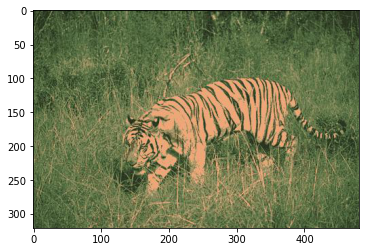

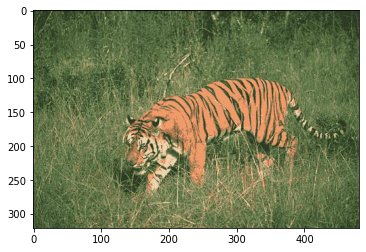

Bad photos


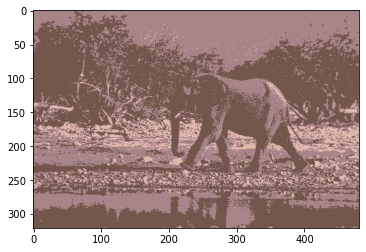

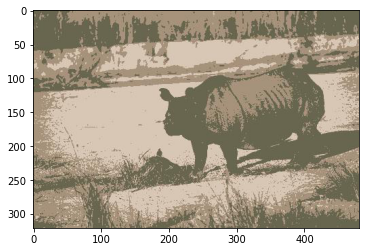

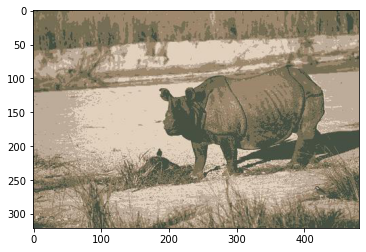

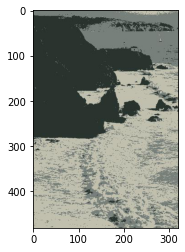

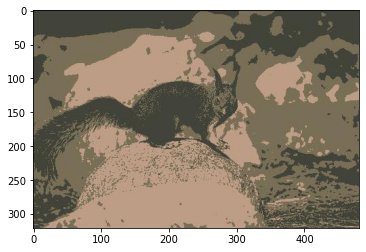

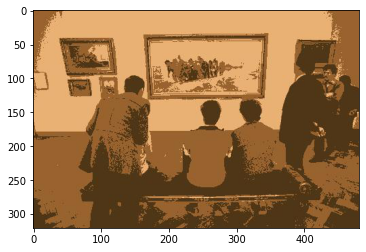

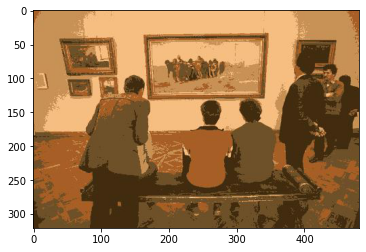

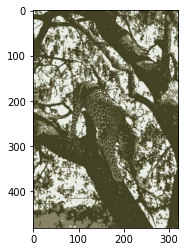

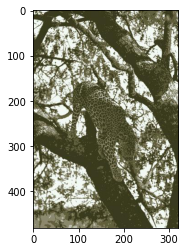

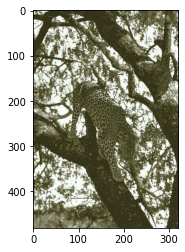

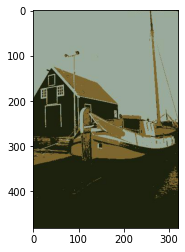

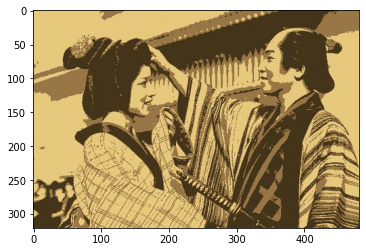

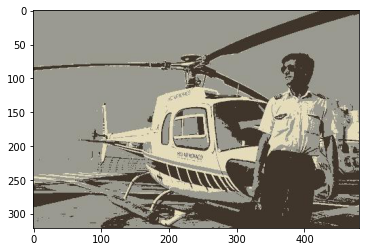

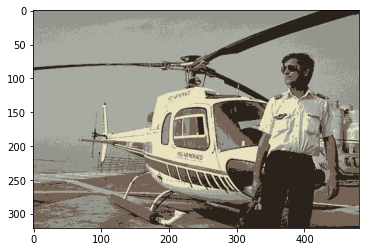

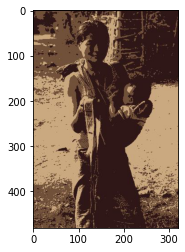

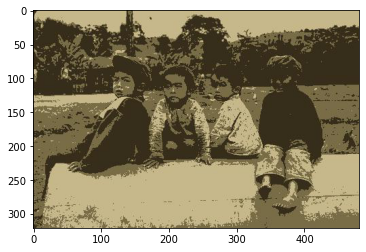

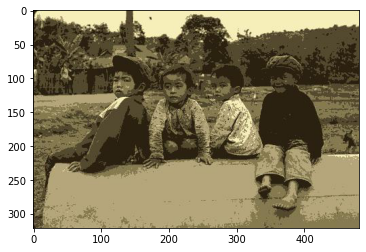

In [12]:
f_measures=np.array(f_measures)
cod_measures=np.array(cod_measures)
size=f_measures.size
fMax=np.amax(f_measures)
fmin=np.amin(f_measures)
fAverage=np.sum(f_measures)/size
enMin=np.amin(cod_measures)
fAverage=np.sum(cod_measures)/(cod_measures.size)
print(f"Max F_measure:{fMax}")
print(f"Min F_measure:{fmin}")
print(f"Average F_measure:{fAverage}")
print(f"min Contional entropy:{enMin}")
print(f"Average Contional entropy:{fAverage}")
print("Good photos")
indicesmax = np.where(f_measures >= fMax-0.1)
for i in range(len(indicesmax[0])): 
    k=[3, 5, 7, 9, 11]
    path = "./" +str(indicesmax[0][i])+ "_" +str(k[indicesmax[1][i]]) + ".jpg"
    plt.imshow(image.imread(path))
    plt.show()
print("Bad photos")
indicesmin = np.where(f_measures <= fmin+0.1 )
for i in range(len(indicesmin[0])):
    k=[3, 5, 7, 9, 11]
    path = "./" +str(indicesmin[0][i])+ "_" +str(k[indicesmin[1][i]]) + ".jpg"
    plt.imshow(image.imread(path)) 
    plt.show()

In [13]:
tempData2 =TrainImages[185]
gt=TrainGroundTruths[185][0]
tempData2 = tempData.reshape((-1, 3))
labels,centroids = kmeans(tempData2,10,5) 
print(getF_measure(labels,gt))
print(getC_entropy(labels,gt))

0.694791938047108
0.30345578991643807


In [14]:
import cv2
def getKNN(P , k):
    nearestKIndecies = []
    n = len(P)
    for i in range(n):
        distances = []
        for j in range(n):
            if j==i:
                distances.append(float('inf'))
            else:
                distances.append( np.sqrt(np.power((P[i][0]-P[j][0]),2)+np.power((P[i][1]-P[j][1]),2)+np.power((P[i][2]-P[j][2]),2)) )
        idx = np.asarray(distances).argsort()
        nearestKIndecies.append(idx[:k])
    return nearestKIndecies

def degreeMatrix(adjacencyMatrix):
    n = len(adjacencyMatrix)
    degreeMatrix = []
    for i in range(n):
        degree = 0
        for j in range(n):
            if adjacencyMatrix[i][j] != 0 and i != j : 
                degree +=1
        degreeMatrix.append(degree)
    return np.diag(degreeMatrix)

def spectralClustering(adjacencyMatrix , k ,n ):
    # calculate Delta (degree matrix)
    degMatrix = degreeMatrix(adjacencyMatrix)
    # L = delta - A
    L = degMatrix - adjacencyMatrix
    # S-1*B -----> Delata-1 * L
    B = np.dot(np.linalg.inv(degMatrix),L)
    # calculate eigenVectors, sort them and get the least 3
    eigenValues , eigenVectors = np.linalg.eig(B)
    idx = eigenValues.argsort()
    eigenValues = eigenValues[idx]
    U = eigenVectors[:,idx]
    U = U[:,:k]
    # normalize using L2 norm equation
    Y = np.zeros(U.shape)
    norms = np.linalg.norm(U,axis = 1,ord=2)
    for row in range(n):
        Y[row] = U[row] / norms[row]
    return Y

def resizeImage(image , newDimensions):
    print('Original image:')
    plt.imshow(image);
    plt.axis('off');
    plt.show()
    image = cv2.resize(image, (newDimensions[1],newDimensions[0]))
    print('Image after resizing:')
    plt.imshow(image);
    plt.axis('off');
    plt.show()
    return image

In [15]:
def segmentationUsingNCut(image , newDimensions):
    image = resizeImage(image , newDimensions)
    image = image.reshape((-1,3))
    image = image.astype('float64')
    n = newDimensions[0]*newDimensions[1]
    similarityMatrixKnn = np.zeros((n,n))
    KnnArray = getKNN(image,5)
    for i in range(n):
        for j in range(n):
            if i==j or (i in KnnArray[j] or j in KnnArray[i]):
                similarityMatrixKnn[i][j] = 1
            else :
                similarityMatrixKnn[i][j] = 0
    Y = spectralClustering(similarityMatrixKnn, 5 , n)
    kmeans = KMeans(5)
    kmeans.fit(Y)
    identified_clusters = kmeans.fit_predict(Y)
    clustered_image = identified_clusters.reshape(newDimensions)
    print('Clustered image:')
    plt.imshow(clustered_image);
    plt.axis('off');
    plt.show()
    return clustered_image

Original image:


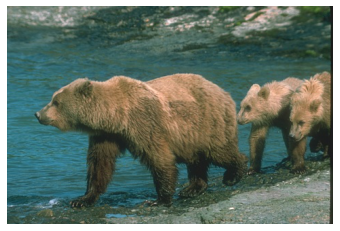

Image after resizing:


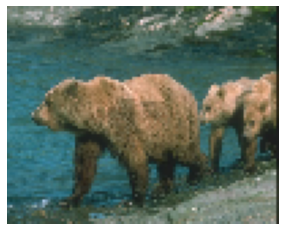

Clustered image:


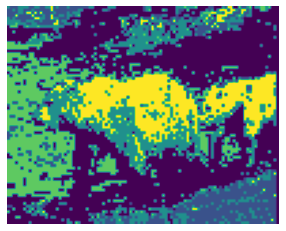

In [16]:
newImage  = segmentationUsingNCut(TrainImages[0] , (80,100))

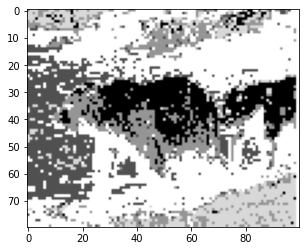

In [17]:
plt.imshow(newImage, cmap="Greys")